In [2]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Assignment1
!ls WHR-2024-5CS037.csv

Mounted at /content/drive
/content/drive/MyDrive/Assignment1
WHR-2024-5CS037.csv


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Problem - 1: Getting Started with Data Exploration - Some Warm up
Exercises:

Dataset Overview:

1. Load the dataset and display the first 10 rows.

In [4]:
#Read the dataset
dataset = pd.read_csv('WHR-2024-5CS037.csv')
#Prints the first 10 rows
dataset.head(10)

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,7.344,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298
5,Netherlands,7.319,1.901,1.462,0.706,0.725,0.247,0.372,1.906
6,Norway,7.302,1.952,1.517,0.704,0.835,0.224,0.484,1.586
7,Luxembourg,7.122,2.141,1.355,0.708,0.801,0.146,0.432,1.540
8,Switzerland,7.060,1.970,1.425,0.747,0.759,0.173,0.498,1.488
9,Australia,7.057,1.854,1.461,0.692,0.756,0.225,0.323,1.745


2. Identify the number of rows and columns in the dataset.

In [5]:
#Prints the nummber of rows and column
print("Number of row and column: ",dataset.shape)

Number of row and column:  (143, 9)


3. List all the columns and their data types.

In [6]:
#Displays the col with it's data type, where zip objects are converted to list
columns_with_dtype = list(zip(dataset.columns, dataset.dtypes))
display(columns_with_dtype)

[('Country name', dtype('O')),
 ('score', dtype('float64')),
 ('Log GDP per capita', dtype('float64')),
 ('Social support', dtype('float64')),
 ('Healthy life expectancy', dtype('float64')),
 ('Freedom to make life choices', dtype('float64')),
 ('Generosity', dtype('float64')),
 ('Perceptions of corruption', dtype('float64')),
 ('Dystopia + residual', dtype('float64'))]

Basic Statistics:

1. Calculate the mean, median, and standard deviation for the Score column.

In [7]:
#Calculating mean, median and standard deviation
mean = dataset['score'].mean()
median = dataset['score'].median()
std_dev = dataset['score'].std()
#Prints the results respectively
print(f"Mean: {mean:.2f}")
print(f"Median: {median:.2f}")
print(f"Standard deviation: {std_dev:.2f}")

Mean: 5.53
Median: 5.79
Standard deviation: 1.17


2. Identify the country with the highest and lowest happiness scores.

In [8]:
#Finds index of max and min value, returns the country name
highest_score = dataset['Country name'] [dataset['score']. idxmax()]
lowest_score = dataset['Country name'] [dataset['score']. idxmin()]
#Prints the country with highest and lowest happiness score
print("The country with highest happiness score is: ", highest_score)
print("The country with lowest happiness score is: ", lowest_score)

The country with highest happiness score is:  Finland
The country with lowest happiness score is:  Afghanistan


Missing Values:

1. Check if there are any missing values in the dataset. If so, display the total count for each column.

In [9]:
#Checks and counts the missing value
missing_values = dataset.isnull().sum()
#Displays the result
display("Missing values in dataset: ", missing_values)

'Missing values in dataset: '

,0
Country name,0
score,0
Log GDP per capita,3
Social support,3
Healthy life expectancy,3
Freedom to make life choices,3
Generosity,3
Perceptions of corruption,3
Dystopia + residual,3


Filtering and Sorting:

1. Filter the dataset to show only the countries with a Score greater than 7.5.

In [10]:
#Filtering the dataset with the countries with Score greater than 7.5
high_score_countries = dataset[dataset['score']>7.5]
#Displays the result
display("Countries with happiness score greater than 7.5: ", high_score_countries)

'Countries with happiness score greater than 7.5: '

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050


2. For the filtered dataset - Sort the dataset by GDP per Capita in descending order and display the
top 10 rows.

In [11]:
#Sorting dataset in descending order according to GDP per Capita
top_10_gdp = high_score_countries.sort_values('Log GDP per capita', ascending= False)
#Printing the top 10 rows
top_10_gdp.head(10)

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082


Adding New Columns:

• Adding New Columns:
1. Create a new column called Happiness Category that categorizes countries into three categories
based on their Score:

In [12]:
def categorize_happiness(score):
  '''
  Define a funtion with parameter score.
  Use if else statement providing condition for each category.
  Create a new column called Happiness Category.
  Add the result accordingly.
  '''
  if score<4:
    return 'Low'
  elif score>=4 and score<=6:
    return 'Medium'
  else:
    return 'High'

dataset['Happiness Category'] = dataset['score'].apply(categorize_happiness)
display(dataset)

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082,High
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881,High
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050,High
3,Sweden,7.344,1.878,1.501,0.724,0.838,0.221,0.524,1.658,High
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298,High
...,...,...,...,...,...,...,...,...,...,...
138,Congo (Kinshasa),3.295,0.534,0.665,0.262,0.473,0.189,0.072,1.102,Low
139,Sierra Leone,3.245,0.654,0.566,0.253,0.469,0.181,0.053,1.068,Low
140,Lesotho,3.186,0.771,0.851,0.000,0.523,0.082,0.085,0.875,Low
141,Lebanon,2.707,1.377,0.577,0.556,0.173,0.068,0.029,-0.073,Low


Data Visualizations:

Bar Plot:

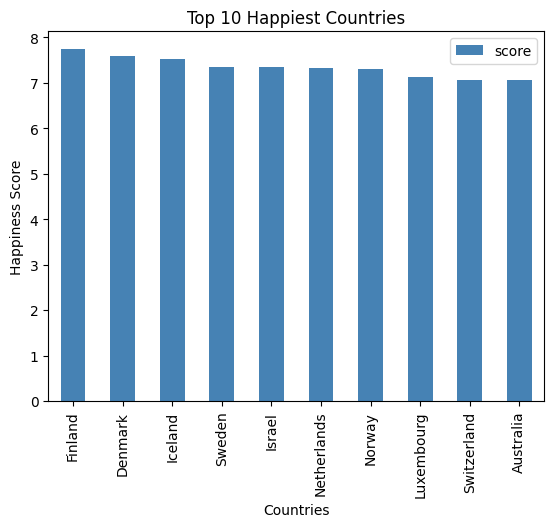

In [13]:
#Select top 10 happiest country from the dataset
top_10_happiest = dataset.nlargest(10, 'score')
#Create a bar plot
top_10_happiest.plot(kind= 'bar', x= 'Country name', y= 'score', color= 'steelblue')
#Set the title
plt.title('Top 10 Happiest Countries')
#Set the x and y labels respectively
plt.xlabel('Countries')
plt.ylabel('Happiness Score')
#Display the plot
plt.show()

Line Plot:

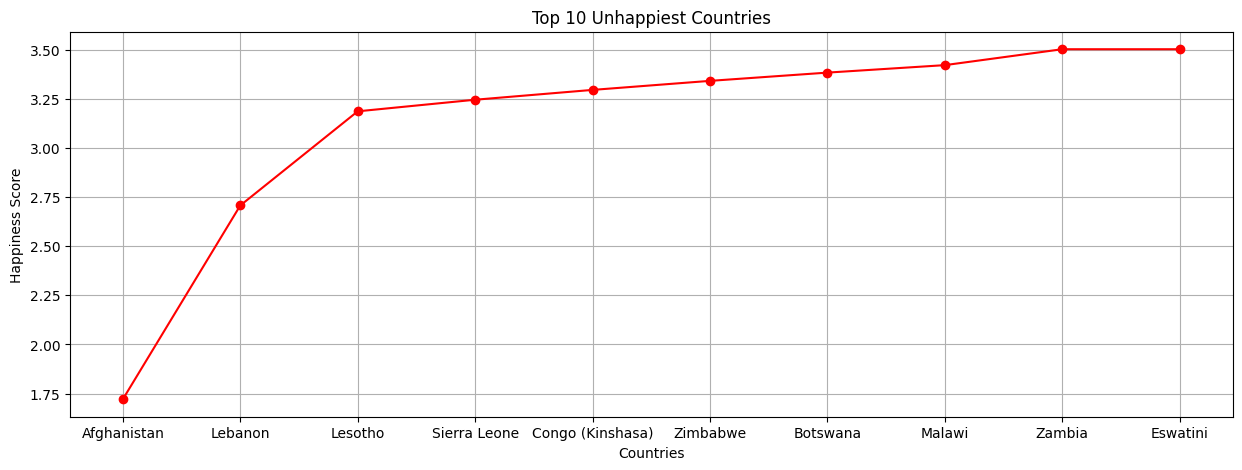

In [14]:
#Select top 10 unhappiest country from the dataset
top_10_unhappiest = dataset.nsmallest(10, 'score')
#Add figure size
plt.figure(figsize=(15,5))
#Create a line plot
plt.plot(top_10_unhappiest['Country name'], top_10_unhappiest['score'], marker ='o', color = 'red')
#Set title of the plot
plt.title('Top 10 Unhappiest Countries')
#Set labels for x and y axis respectively
plt.xlabel('Countries')
plt.ylabel('Happiness Score')
#Make a grid for clear visual representation
plt.grid()
#Display the plot
plt.show()

Plot a histogram:

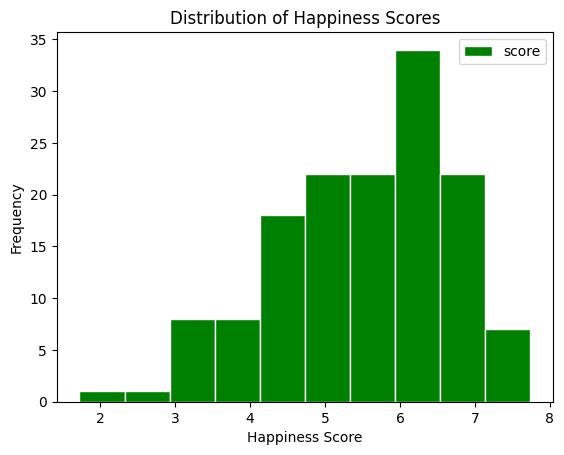

In [15]:
#Select score column from dataset to create histogram
dataset['score'].plot(kind ='hist', edgecolor = 'white', color = 'green')
#Set the title
plt.title('Distribution of Happiness Scores')
#Set the x and y labels respectively
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
#Adding legend
plt.legend()
#Display the histogram
plt.show()

Interpretation:
1. dataset['score'].plot(kind ='hist', edgecolor = 'white', color = 'green'): Creates a histogram of the score column from the dataset, with green bars and white outlines.
2. plt.title(): Adds title to the plot.
3. plt.xlabel() and plt.ylabel() : Adds label to x and y axis respectively.
4. plt.show(): Displays the plot.

Scatter Plot:

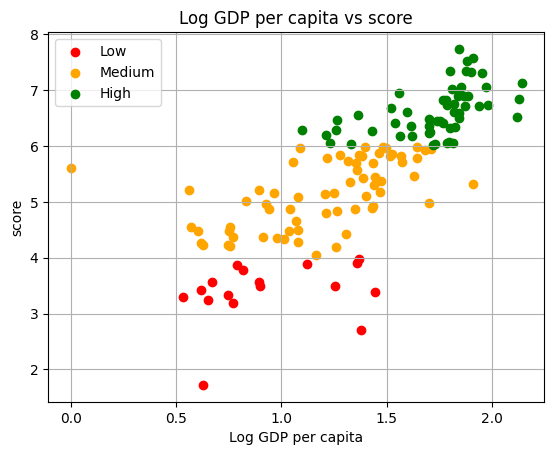

In [16]:
#Assiging different colors for each category
categories = {'Low': 'red', 'Medium': 'orange', 'High': 'green'}

#For-each loop
for category, color in categories.items():
  subset = dataset[dataset['Happiness Category'] == category]
  plt.scatter(subset['Log GDP per capita'], subset['score'],
  label=category, color=color)
#Set the title
plt.title('Log GDP per capita vs score')
#Set the x and y labels
plt.xlabel('Log GDP per capita')
plt.ylabel('score')
#Make a grid for clear visual representation
plt.grid()
#Add a legend
plt.legend()
#Display the scatter plot
plt.show()

Problem - 2 - Some Advance Data Exploration Task:

Task - 1 - Setup Task - Preparing the South-Asia Dataset:

1. Define the countries in South Asia with a list for example:
south asian countries = ["Afghanistan", "Bangladesh", "Bhutan", "India",

"Maldives", "Nepal", "Pakistan", "Srilanka"]

2. Use the list from step - 1 to filtered the dataset {i.e. filtered out matching dataset from list.}

In [17]:
#Define a list of south asian countries
south_asian_countries = ['Afghanistan', 'Bangladesh', 'Bhutan', 'India', 'Maldives', 'Nepal', 'Pakistan', 'Sri Lanka']
#Filter out rows that doesnot have south asian countries
south_asian_data = dataset[dataset['Country name'].isin(south_asian_countries)]
#Display the presented data of the countries
display(south_asian_data)

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category
92,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,Medium
107,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,Medium
125,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,Medium
127,Sri Lanka,3.898,1.361,1.179,0.586,0.583,0.144,0.031,0.014,Low
128,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,Low
142,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,Low


3. Save the filtered dataframe as separate CSV files for future use.

In [18]:
#Save the above dataframe in a separate CSV without any indexing
south_asian_data.to_csv('south_asian_happiness.csv', index = False)

Task - 2 - Composite Score Ranking:

Tasks:
1. Using the SouthAsia DataFrame, create a new column called Composite Score that combines the
following metrics:

Composite Score = 0.40 × GDP per Capita + 0.30 × Social Support

+ 0.30 × Healthy Life Expectancy

In [43]:
#Create a new column using SouthAsian Dataframe
#loc: used to show explicity that u are modifying all rows of south asian data
south_asian_data.loc[:,'Composite Score'] = (0.40 * south_asian_data['Log GDP per capita']
                                          + 0.30 * south_asian_data['Social support']
                                          + 0.30 * south_asian_data['Healthy life expectancy'])
#Display the dataframe
display(south_asian_data)

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category,Composite Score,GDP-Score Gap,Region
92,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,Medium,0.8159,-4.193,South Asia
107,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,Medium,0.7039,-3.588,South Asia
125,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,Medium,0.7874,-2.888,South Asia
127,Sri Lanka,3.898,1.361,1.179,0.586,0.583,0.144,0.031,0.014,Low,1.0739,-2.537,South Asia
128,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,Low,0.6774,-2.764,South Asia
142,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,Low,0.3238,-1.093,South Asia


2. Rank the South Asian countries based on the Composite Score in descending order.

In [20]:
#Sort the value in asc order according to composite score
south_asian_sorted = south_asian_data.sort_values('Composite Score', ascending = False)
#Display the dataset after sorting
display(south_asian_sorted)

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category,Composite Score
127,Sri Lanka,3.898,1.361,1.179,0.586,0.583,0.144,0.031,0.014,Low,1.0739
92,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,Medium,0.8159
125,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,Medium,0.7874
107,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,Medium,0.7039
128,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,Low,0.6774
142,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,Low,0.3238


3. Visualize the top 5 countries using a horizontal bar chart showing the Composite Score.

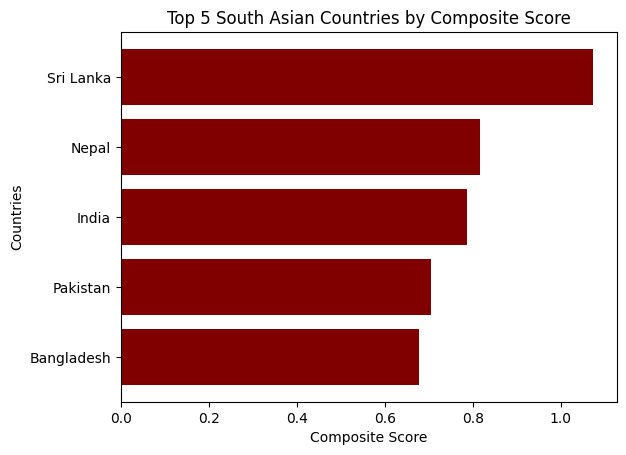

In [21]:
#Assign the top 5 rows that was sorted
top_5_countries = south_asian_sorted.head(5)
#Plot the horizontal bargraph
plt.barh(top_5_countries['Country name'], top_5_countries['Composite Score'], color = 'maroon')
#Set the title
plt.title('Top 5 South Asian Countries by Composite Score')
#Set the labels for x and y axis respectively
plt.xlabel('Composite Score')
plt.ylabel('Countries')
#Invert y axis
plt.gca().invert_yaxis()
#Display the plot
plt.show()

4. Discuss whether the rankings based on the Composite Score align with the original Score - support your
discussion with some visualization plot.

Discussion:

The ranking based on Composite Score and Original Score doesnot align closely. Composite Score is influenced by economic and social factors like GDP, Social Support and Life Expectancy, whereas Original Score reflects subjective well-being. Some countries with lower happiness score have high Composite Score due to higher economic or health metrices. But, happiness can't be measured fully by just economic indicators rather looked out by personal satisfaction.

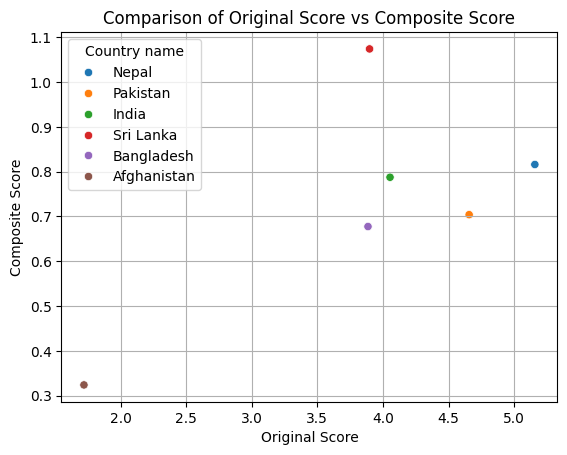

In [22]:
#Select actual score and composite score from dataset to create scatter Plot
sns.scatterplot(x='score', y='Composite Score', data=south_asian_data, hue='Country name')
#Set the title
plt.title('Comparison of Original Score vs Composite Score')
#Set the labels for x and y axis respectively
plt.xlabel('Original Score')
plt.ylabel('Composite Score')
#Make a grid for clear visual representation
plt.grid()
#Display the scatter plot
plt.show()

Task - 3 - Outlier Detection:

1. Identify outlier countries in South Asia based on their Score and GDP per Capita.
2. Define outliers using the 1.5 × IQR rule.

In [23]:
#Calculate the first and third quartile for 'score'
Q1_score = south_asian_data['score'].quantile(0.25)
Q3_score = south_asian_data['score'].quantile(0.75)
#Calculate the interquartile range for 'score'
IQR_score = Q3_score - Q1_score

#Calculate the first and third quartile for 'GDP'
Q1_gdp = south_asian_data['Log GDP per capita'].quantile(0.25)
Q3_gdp = south_asian_data['Log GDP per capita'].quantile(0.75)
#Calculate the interquartile range for 'GDP'
IQR_gdp = Q3_gdp - Q1_gdp

#Calculate outliers for score nad gdp
score_outliers = south_asian_data[(south_asian_data['score']< (Q1_score - 1.5 * IQR_score))|
                                  (south_asian_data['score'] > (Q3_score + 1.5 * IQR_score))]

gdp_outliers = south_asian_data[(south_asian_data['Log GDP per capita']< (Q1_gdp - 1.5 * IQR_gdp))|
                                  (south_asian_data['Log GDP per capita'] > (Q3_gdp + 1.5 * IQR_gdp))]

#Combine outliers from score and gdp to single dataframe
#Remove duplicate rows that appear in both categories
outliers = pd.concat([score_outliers, gdp_outliers]).drop_duplicates()
#Display the outlier dataframe
display(outliers)

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category,Composite Score
142,Afghanistan,1.721,0.628,0.0,0.242,0.0,0.091,0.088,0.672,Low,0.3238


3. Create a scatter plot with GDP per Capita on the x-axis and Score on the y-axis, highlighting outliers
in a different color.

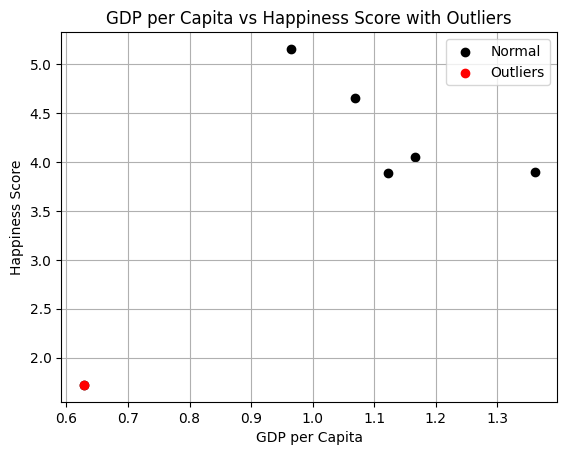

In [24]:
#Select GDP and score from dataset to create scatter Plot
plt.scatter(south_asian_data['Log GDP per capita'], south_asian_data['score'], color = 'black', label = 'Normal')
#Select GDP and score from outliers
plt.scatter(outliers['Log GDP per capita'], outliers['score'], color = 'red', label = 'Outliers')
#Set title for the plot
plt.title('GDP per Capita vs Happiness Score with Outliers')
#Set labels for x and y axis respectively
plt.xlabel('GDP per Capita')
plt.ylabel('Happiness Score')
#Add legend to differentiate normal and outliers
plt.legend()
#Add grid
plt.grid()
#Display the plot
plt.show()

4. Discuss the characteristics of these outliers and their potential impact on regional averages.

Characteristics of outliers:
1. Outliers in GDP: Countries with extremely high or low GDP compared to others.
2. Outliers in Score: Countries with exceptionally high or low happiness scores compared to others.

Impact on Regional Averages:

A country with high GDP but low happiness can increase the average GDP while reducing the average happiness score and vice-versa. These extreme values might not show the actual situation of countries, making it less accurate and precise. Hence, identifying outliers helps to provide precise and unbaised understanding of the data.

Task - 4 - Exploring Trends Across Metrics:
1. Choose two metrics (e.g., Freedom to Make Life Choices and Generosity) and calculate their correlation
{pearson correlation} with the Score for South Asian countries.

In [25]:
#Calculate the correlation between freedom and generosity with south asian data applying pearson method
freedom_correlation = south_asian_data['Freedom to make life choices'].corr(south_asian_data['score'], method = 'pearson')
generosity_correlation = south_asian_data['Generosity'].corr(south_asian_data['score'], method = 'pearson')
#Print the correlations
print(f"Correlation between Freedom to make life choices and Score:  {freedom_correlation:.2f}")
print(f"Correlation between Generosity and Score:  {generosity_correlation:.2f}")

Correlation between Freedom to make life choices and Score:  0.80
Correlation between Generosity and Score:  0.87


2. Create scatter plots with trendlines for these metrics against the Score.

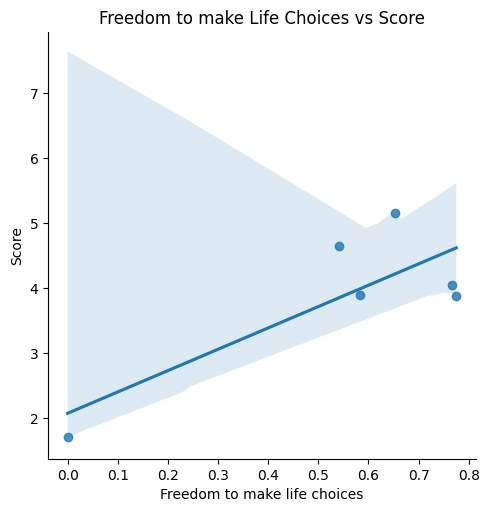

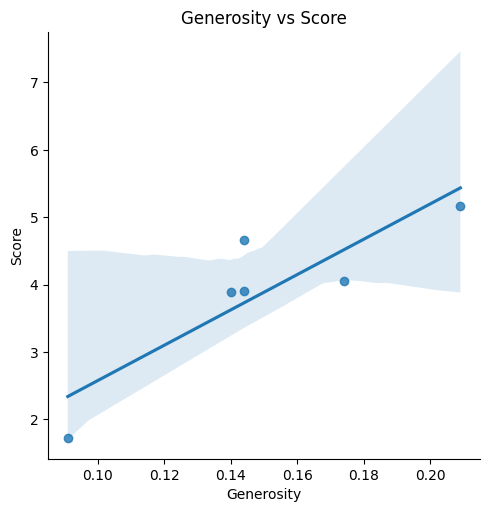

In [26]:
#Scatter plot, linear model plot for Freedom vs Score from south asian dataset
sns.lmplot(data=south_asian_data, x='Freedom to make life choices', y='score')
#Set the title
plt.title('Freedom to make Life Choices vs Score')
#Set x and y labels
plt.xlabel('Freedom to make life choices')
plt.ylabel('Score')
#Display the plot
plt.show()

#Scatter plot,linear model plot for Generosity vs Score from south asian dataset
sns.lmplot(data=south_asian_data, x='Generosity', y='score')
#Set the title
plt.title('Generosity vs Score')
#Set x and y labels
plt.xlabel('Generosity')
plt.ylabel('Score')
#Display the plot
plt.show()

3. Identify and discuss the strongest and weakest relationships between these metrics and the Score for
South Asian countries.

Strongest Relationship: The relationship between Generosity and Score(0.87) is the strongest which indicates that countries where people are more generous tend to be happier overall.

Weakest Relationship: Although, Freedom to Make Life Choices and Score have a strong relationship (0.80), it seems slightly weaker than Generosity.  

Both play a vital role in increasing happiness score in the south asian countries. But, we can conclude that people tend to be happier when others around them show kindness and willingness to help them whenever necessary.


Task - 5 - Gap Analysis:

1. Add a new column, GDP-Score Gap, which is the difference between GDP per Capita and the Score
for each South Asian country.

In [44]:
#Adding a new column called GDP-Score Gap (addressing that you're modifying the original data)
south_asian_data.loc[:,'GDP-Score Gap'] = south_asian_data['Log GDP per capita'] - south_asian_data['score']
#Display the dataset
display(south_asian_data)

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category,Composite Score,GDP-Score Gap,Region
92,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,Medium,0.8159,-4.193,South Asia
107,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,Medium,0.7039,-3.588,South Asia
125,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,Medium,0.7874,-2.888,South Asia
127,Sri Lanka,3.898,1.361,1.179,0.586,0.583,0.144,0.031,0.014,Low,1.0739,-2.537,South Asia
128,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,Low,0.6774,-2.764,South Asia
142,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,Low,0.3238,-1.093,South Asia


2. Rank the South Asian countries by this gap in both ascending and descending order.

In [28]:
#Find ascending order of GDP-Score Gap
ascending_gap = south_asian_data.sort_values('GDP-Score Gap', ascending= True)
#Print and Display the dataset
print("Ascending order of GDP-Score Gap: ")
display(ascending_gap)

Ascending order of GDP-Score Gap: 


,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category,Composite Score,GDP-Score Gap
92,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,Medium,0.8159,-4.193
107,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,Medium,0.7039,-3.588
125,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,Medium,0.7874,-2.888
128,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,Low,0.6774,-2.764
127,Sri Lanka,3.898,1.361,1.179,0.586,0.583,0.144,0.031,0.014,Low,1.0739,-2.537
142,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,Low,0.3238,-1.093


In [29]:
#Find descending order of GDP-Score Gap
descending_gap = south_asian_data.sort_values('GDP-Score Gap', ascending= False)
#Print and Display the dataset
print("Descending order of GDP-Score Gap: ")
display(descending_gap)

Descending order of GDP-Score Gap: 


,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category,Composite Score,GDP-Score Gap
142,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,Low,0.3238,-1.093
127,Sri Lanka,3.898,1.361,1.179,0.586,0.583,0.144,0.031,0.014,Low,1.0739,-2.537
128,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,Low,0.6774,-2.764
125,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,Medium,0.7874,-2.888
107,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,Medium,0.7039,-3.588
92,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,Medium,0.8159,-4.193


3. Highlight the top 3 countries with the largest positive and negative gaps using a bar chart.

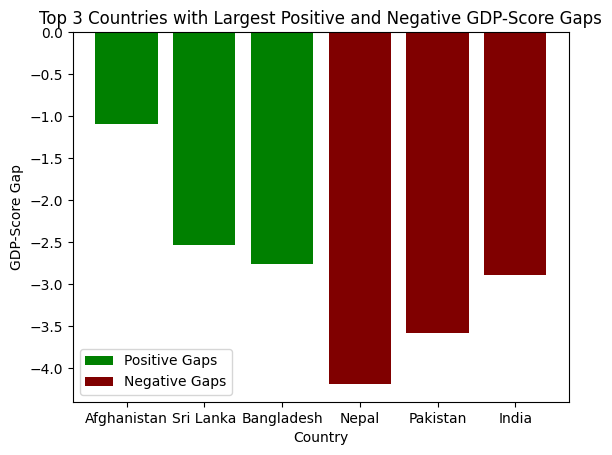

In [30]:
#Get top3 countries with positive and negative gaps
top_positive_gap = descending_gap.head(3)
top_negative_gap = ascending_gap.head(3)
#Plot positive gaps
plt.bar(top_positive_gap['Country name'], top_positive_gap['GDP-Score Gap'], color='green', label='Positive Gaps')
#Plot negative gaps
plt.bar(top_negative_gap['Country name'], top_negative_gap['GDP-Score Gap'] , color='maroon', label='Negative Gaps')
#Set the title
plt.title('Top 3 Countries with Largest Positive and Negative GDP-Score Gaps')
#Set the x and y labels
plt.xlabel('Country')
plt.ylabel('GDP-Score Gap')
#Add legend
plt.legend()
#Display the plot
plt.show()

4. Analyze the reasons behind these gaps and their implications for South Asian countries.

Reasons:

1. Economic disparities and unequal distribution of wealth between people of the same country.
2. Factors like corruption, poor public services, unemployment, etc. reduces happiness level.
3. Lack of good education system, health care facilities and quality of life impact the overall happiness.
4. Under utilization of available resources.
5. Little knowledge regarding commerce and trading.

Implications:

1. Reducing inequality and bizarre social/traditional beliefs.
2. Promoting balanced development in both rural and urban areas.
3. Investing in health care, education and employment sectors.
4. Feeling of empathy and transparency must be developed within the people of a nation.
5. Full and optimum utilization of resources using modern tools and technologies, allowing products import and export with proper advertisement.

3.3 Problem - 3 - Comparative Analysis:

Task - 1 - Setup Task - Preparing the Middle Eastern Dataset:

1. Similar in Task - 1 of Problem 2 create a dataframe from middle eastern countries. For hint use the
following list:
middle east countries = [ "Bahrain", "Iran", "Iraq", "Israel", "Jordan",
"Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria",

"United Arab Emirates", "Yemen"]

In [31]:
# Creating a dataframe for middle east countries
middle_east_countries = ["Bahrain", "Iran", "Iraq", "Israel", "Jordan", "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria",
"United Arab Emirates", "Yemen"]
#Filter the rows with only Middle east Countries
middle_east_data = dataset[dataset['Country name'].isin(middle_east_countries)]
#Display the dataset
display(middle_east_data)

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298,High
12,Kuwait,6.951,1.845,1.364,0.661,0.827,0.200,0.172,1.884,High
21,United Arab Emirates,6.733,1.983,1.164,0.563,0.815,0.209,0.258,1.741,High
27,Saudi Arabia,6.594,1.842,1.361,0.511,0.787,0.114,0.188,1.790,High
61,Bahrain,5.959,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Medium
91,Iraq,5.166,1.249,0.996,0.498,0.425,0.141,0.048,1.809,Medium
99,Iran,4.923,1.435,1.136,0.571,0.366,0.235,0.123,1.057,Medium
124,Jordan,4.186,1.262,0.983,0.594,0.593,0.059,0.189,0.504,Medium
132,Yemen,3.561,0.671,1.281,0.293,0.362,0.080,0.113,0.760,Low
141,Lebanon,2.707,1.377,0.577,0.556,0.173,0.068,0.029,-0.073,Low


1. Descriptive Statistics:

• Calculate the mean, Standard deviation of the score for both South Asia and Middle East.

• Which region has higher happiness Scores on average?

In [45]:
#Calculate the mean and standard deviation of south asian countries
south_asian_mean = south_asian_data['score'].mean()
south_asian_std = south_asian_data['score'].std()
#Calculate the mean and standard deviation of middle east countries
middle_east_mean = middle_east_data['score'].mean()
middle_east_std = middle_east_data['score'].std()
#Printing the results
print(f"South Asian Mean: {south_asian_mean:.2f}")
print(f"South Asian Standard Deviation: {south_asian_std:.2f}")
print(f"Middle East Mean: {middle_east_mean:.2f}")
print(f"Middle East Standard Deviation: {middle_east_std:.2f}")

#Comparing
if south_asian_mean > middle_east_mean:
    print("South Asia has higher happiness scores on average.")
else:
    print("Middle East has higher happiness scores on average.")

South Asian Mean: 3.90
South Asian Standard Deviation: 1.18
Middle East Mean: 5.41
Middle East Standard Deviation: 1.57
Middle East has higher happiness scores on average.


2. Top and Bottom Performers:

• Identify the top 3 and bottom 3 countries in each region based on the score.

• Plot bar charts comparing these charts.

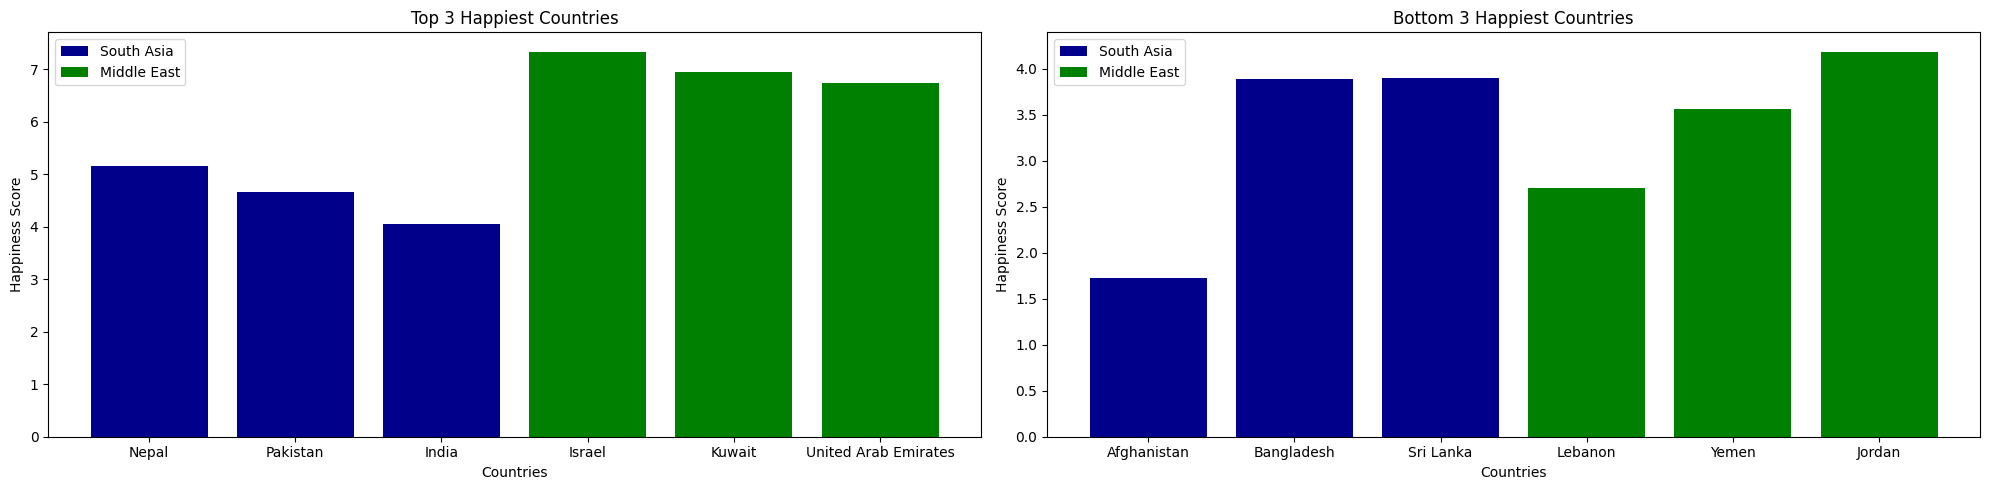

In [33]:
#Top and Bottom 3 for South Asia
top3_south_asia = south_asian_data.nlargest(3, 'score')
bottom3_south_asia = south_asian_data.nsmallest(3, 'score')
#Top and Bottom 3 for Middle East
top3_middle_east = middle_east_data.nlargest(3, 'score')
bottom3_middle_east = middle_east_data.nsmallest(3, 'score')

#Top 3 Happiest:
#Set the width and height in figsize
plt.figure(figsize=(20,5))
#Set the subplot as rows, columns and index
plt.subplot(1,2,1)
#Plot for south asian countries
plt.bar(top3_south_asia['Country name'], top3_south_asia['score'], color='darkblue', label='South Asia')
#Plot for middle east countries
plt.bar(top3_middle_east['Country name'], top3_middle_east['score'], color='green', label='Middle East')
#Set the title
plt.title('Top 3 Happiest Countries')
#Set x and y labels respectively
plt.xlabel('Countries')
plt.ylabel('Happiness Score')
#Add legend
plt.legend()

#Bottom 3 Happiest:
#Set the subplot as rows, columns and index
plt.subplot(1,2,2)
#Plot for south asian countries
plt.bar(bottom3_south_asia['Country name'], bottom3_south_asia['score'], color='darkblue', label='South Asia')
#Plot for middle east countries
plt.bar(bottom3_middle_east['Country name'], bottom3_middle_east['score'], color='green', label='Middle East')
#Set the title
plt.title('Bottom 3 Happiest Countries')
#Set x and y labels respectively
plt.xlabel('Countries')
plt.ylabel('Happiness Score')
#Add legend
plt.legend()

#Add tight_layout to avoid overlapping
plt.tight_layout()
#Display the plots
plt.show()

3. Metric Comparisons:

• Compare key metrics like GDP per Capita, Social Support, and Healthy Life Expectancy
between the regions using grouped bar charts.

• Which metrics show the largest disparity between the two regions?

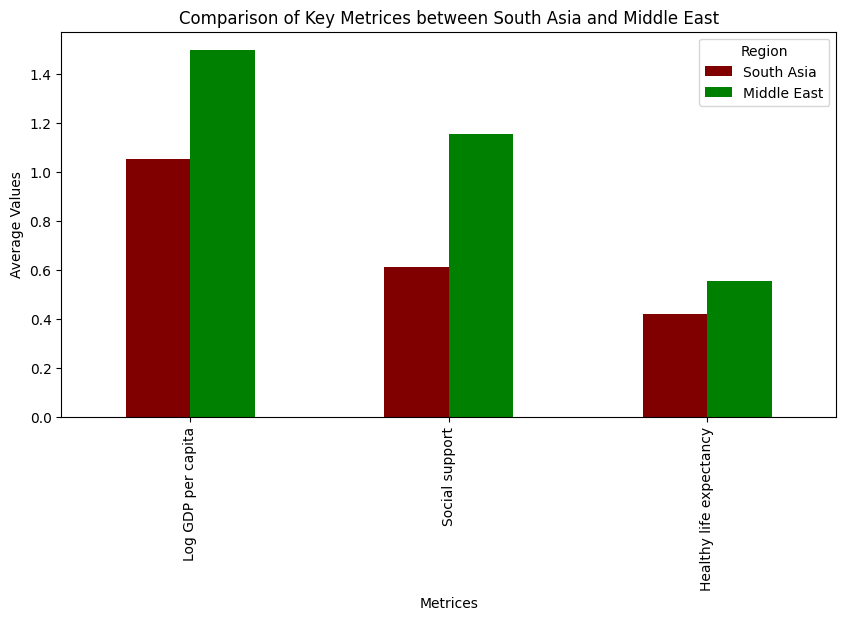

The metric with the largest disparity is Social support with a value of 0.54.


In [34]:
#List of metrices
metrices = ['Log GDP per capita', 'Social support', 'Healthy life expectancy']
#Calculate the mean values of selected metrices
south_asian_means = south_asian_data[metrices].mean()
middle_east_means = middle_east_data[metrices].mean()
#Create the dataframe to hold the means
compare_df= pd.DataFrame({
    'South Asia': south_asian_means,
    'Middle East': middle_east_means
})

#Plot the grouped bar chart
compare_df.plot(kind='bar', figsize=(10,5), color=['maroon', 'green'])
#Set the title
plt.title('Comparison of Key Metrices between South Asia and Middle East')
#Set x and y labels respectively
plt.xlabel('Metrices')
plt.ylabel('Average Values')
#Add legend with a title
plt.legend(title='Region')
#Display the plot
plt.show()

#Calcuting which metrices show disparity between two regions
disparity = abs(compare_df['South Asia'] - compare_df['Middle East'])
#Identify the metric with the highest disparity
largest_disparity_metric = disparity.idxmax()
largest_disparity_value = disparity.max()
#Printing the result
print(f"The metric with the largest disparity is {largest_disparity_metric} with a value of {largest_disparity_value:.2f}.")

4. Happiness Disparity:

• Compute the range (max - min) and coefficient of variation (CV) for Score in both regions.

• Which region has greater variability in happiness?

In [48]:
#Computing range of South Asia and Middle East
south_asian_range = south_asian_data['score'].max() - south_asian_data['score'].min()
middle_east_range = middle_east_data['score'].max() - middle_east_data['score'].min()
#Computing Coefficient of variation(CV)
south_asian_cv = south_asian_data['score'].std()/south_asian_data['score'].mean()
middle_east_cv = middle_east_data['score'].std()/middle_east_data['score'].mean()
#Printing the results
print(f"Range of South Asia: {south_asian_range:.2f}")
print(f"Range of Middle East: {middle_east_range:.2f}")
print(f"CV of South Asia: {south_asian_cv:.2f}")
print(f"CV of Middle East: {middle_east_cv:.2f}")

#Comparing variability in happiness
if south_asian_cv > middle_east_cv:
  print("South Asian has higher variability in happiness scores.")
else:
  print("Middle East has higher variability in happiness scores.")

Range of South Asia: 3.44
Range of Middle East: 4.63
CV of South Asia: 0.30
CV of Middle East: 0.29
South Asian has higher variability in happiness scores.


5. Correlation Analysis:

• Analyze the correlation of Score with other metrics Freedom to Make Life Choices, and
Generosity within each region.

In [36]:
#Analyzing correlation of freedom and generosity with score for South Asia
south_asia_freedom_correlation = south_asian_data['Freedom to make life choices'].corr(south_asian_data['score'])
south_asia_generosity_correlation = south_asian_data['Generosity'].corr(south_asian_data['score'])
#Analyzing correlation of freedom and generosity with score for Middle East
middle_east_freedom_correlation = middle_east_data['Freedom to make life choices'].corr(middle_east_data['score'])
middle_east_generosity_correlation = middle_east_data['Generosity'].corr(middle_east_data['score'])
#Print the results
print(f"Correlation between Freedom and Scores (South Asia): {south_asia_freedom_correlation:.2f}")
print(f"Correlation between Generosity and Scores (South Asia): {south_asia_generosity_correlation:.2f}")
print(f"Correlation between Freedom and Scores (Middle East): {middle_east_freedom_correlation:.2f}")
print(f"Correlation between Generosity and Scores (Middle East): {middle_east_generosity_correlation:.2f}")

Correlation between Freedom and Scores (South Asia): 0.80
Correlation between Generosity and Scores (South Asia): 0.87
Correlation between Freedom and Scores (Middle East): 0.86
Correlation between Generosity and Scores (Middle East): 0.63


• Create scatter plots to visualize and interpret the relationships.

For Score Vs Freedom to make life choices

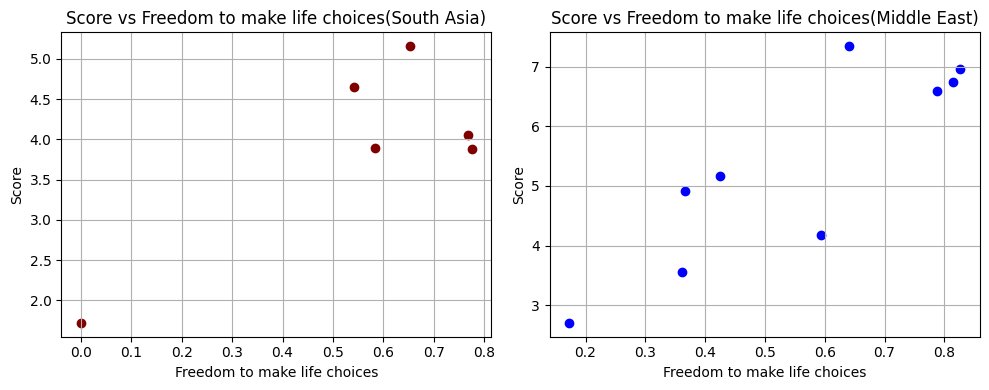

In [37]:
#Scatter plot for Score vs Freedom to make life choices
plt.figure(figsize=(10,4))

#South Asia
#Subplot (row, col, index)
plt.subplot(1,2,1)
#Make a scatter plot
plt.scatter(south_asian_data['Freedom to make life choices'], south_asian_data['score'], color= 'maroon')
#Set the title
plt.title('Score vs Freedom to make life choices(South Asia)')
#Set x and y labels respectively
plt.xlabel('Freedom to make life choices')
plt.ylabel('Score')
#Add a grid for clear visual representation
plt.grid()

#Middle East
#Subplot (row, col, index)
plt.subplot(1,2,2)
#Make a scatter plot
plt.scatter(middle_east_data['Freedom to make life choices'], middle_east_data['score'], color= 'blue')
#Set the title
plt.title('Score vs Freedom to make life choices(Middle East)')
#Set x and y labels respectively
plt.xlabel('Freedom to make life choices')
plt.ylabel('Score')
#Add a grid for clear visual representation
plt.grid()

#Adjust layout to prevent overlap
plt.tight_layout()
#Display the plot
plt.show()

For Score Vs Generosity

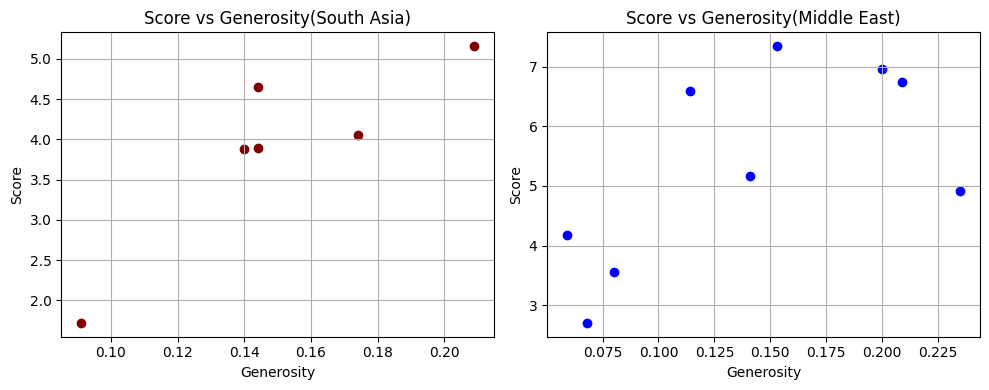

In [38]:
#Scatter plot for Score vs Generosity
plt.figure(figsize=(10,4))

#South Asia
#Subplot (row, col, index)
plt.subplot(1,2,1)
#Make a scatter plot
plt.scatter(south_asian_data['Generosity'], south_asian_data['score'], color= 'maroon')
#Set the title
plt.title('Score vs Generosity(South Asia)')
#Set x and y labels respectively
plt.xlabel('Generosity')
plt.ylabel('Score')
#Add a grid for clear visual representation
plt.grid()

#Middle East
#Subplot (row, col, index)
plt.subplot(1,2,2)
#Make a scatter plot
plt.scatter(middle_east_data['Generosity'], middle_east_data['score'], color= 'blue')
#Set the title
plt.title('Score vs Generosity(Middle East)')
#Set x and y labels respectively
plt.xlabel('Generosity')
plt.ylabel('Score')
#Add a grid for clear visual representation
plt.grid()

#Adjust layout to prevent overlap
plt.tight_layout()
#Display the plot
plt.show()

6. Outlier Detection:

• Identify outlier countries in both regions based on Score and GDP per Capita.

For South Asia:

In [39]:
# Calculate Q1, Q3 and IQR for Score(South Asia)
Q1_score_south = south_asian_data['score'].quantile(0.25)
Q3_score_south = south_asian_data['score'].quantile(0.75)
IQR_score_south = Q3_score_south - Q1_score_south

# Calculate Q1, Q3 and IQR for GDP(South Asia)
Q1_gdp_south = south_asian_data['Log GDP per capita'].quantile(0.25)
Q3_gdp_south = south_asian_data['Log GDP per capita'].quantile(0.75)
IQR_gdp_south = Q3_gdp_south - Q1_gdp_south

# Calculate outliers for score and GDP for South Asia
score_outliers_south = south_asian_data[(south_asian_data['score'] < (Q1_score_south - 1.5 * IQR_score_south)) |
                                         (south_asian_data['score'] > (Q3_score_south + 1.5 * IQR_score_south))]

gdp_outliers_south = south_asian_data[(south_asian_data['Log GDP per capita'] < (Q1_gdp_south - 1.5 * IQR_gdp_south)) |
                                       (south_asian_data['Log GDP per capita'] > (Q3_gdp_south + 1.5 * IQR_gdp_south))]

# Combine outliers from score and GDP for South Asia and remove duplicates
outliers_south = pd.concat([score_outliers_south, gdp_outliers_south]).drop_duplicates()

# Display the outlier dataframes for South Asia
print("Outliers for South Asia:")
display(outliers_south)

Outliers for South Asia:


,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category,Composite Score,GDP-Score Gap
142,Afghanistan,1.721,0.628,0.0,0.242,0.0,0.091,0.088,0.672,Low,0.3238,-1.093


For Middle East:

In [40]:
# Calculate Q1, Q3 and IQR for Score(Middle East)
Q1_score_middle = middle_east_data['score'].quantile(0.25)
Q3_score_middle = middle_east_data['score'].quantile(0.75)
IQR_score_middle = Q3_score_middle - Q1_score_middle

# Calculate Q1, Q3 and IQR for GDP(Middle East)
Q1_gdp_middle = middle_east_data['Log GDP per capita'].quantile(0.25)
Q3_gdp_middle = middle_east_data['Log GDP per capita'].quantile(0.75)
IQR_gdp_middle = Q3_gdp_middle - Q1_gdp_middle

# Calculate outliers for score and GDP for Middle East
score_outliers_middle = middle_east_data[(middle_east_data['score'] < (Q1_score_middle - 1.5 * IQR_score_middle)) |
                                         (middle_east_data['score'] > (Q3_score_middle + 1.5 * IQR_score_middle))]

gdp_outliers_middle = middle_east_data[(middle_east_data['Log GDP per capita'] < (Q1_gdp_middle - 1.5 * IQR_gdp_middle)) |
                                       (middle_east_data['Log GDP per capita'] > (Q3_gdp_middle + 1.5 * IQR_gdp_middle))]

# Combine outliers from score and GDP for Middle East and remove duplicates
outliers_middle = pd.concat([score_outliers_middle, gdp_outliers_middle]).drop_duplicates()

# Display the outlier dataframes for Middle East
print("Outliers for Middle East:")
display(outliers_middle)

Outliers for Middle East:


,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category


• Plot these outliers and discuss their implications.

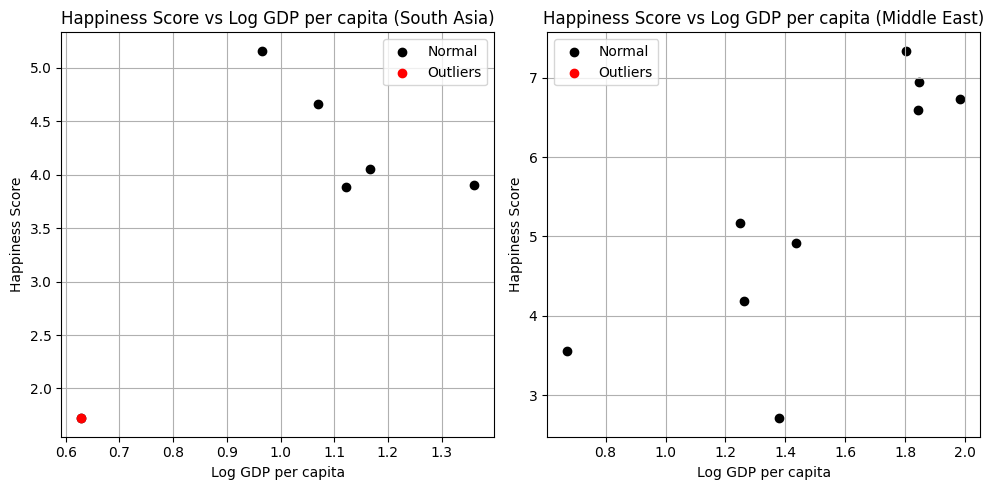

In [41]:
#Set the figure size
plt.figure(figsize = (10, 5))

#South Asia:
#Set the subplot(row, col, index)
plt.subplot(1,2,1)
#Make a scatter plot(Normal data)
plt.scatter(south_asian_data['Log GDP per capita'], south_asian_data['score'], color = 'black', label ='Normal')
#Make a scatter plot(Outliers)
plt.scatter(outliers_south['Log GDP per capita'], outliers_south['score'], color = 'red', label = 'Outliers')
#Set the title
plt.title('Happiness Score vs Log GDP per capita (South Asia)')
#Set the x and y labels respectively
plt.xlabel('Log GDP per capita')
plt.ylabel('Happiness Score')
#Add a legend
plt.legend()
#Add a grid for clear visual representation
plt.grid()

#Middle East:
#Set the subplot(row, col, index)
plt.subplot(1,2,2)
#Make a scatter plot(Normal data)
plt.scatter(middle_east_data['Log GDP per capita'], middle_east_data['score'], color = 'black', label ='Normal')
#Make a scatter plot(Outliers)
plt.scatter(outliers_middle['Log GDP per capita'], outliers_middle['score'], color = 'red', label = 'Outliers')
#Set the title
plt.title('Happiness Score vs Log GDP per capita (Middle East)')
#Set the x and y labels respectively
plt.xlabel('Log GDP per capita')
plt.ylabel('Happiness Score')
#Add a legend
plt.legend()
#Add a grid for clear visual representation
plt.grid()

#Display the plots
plt.tight_layout()
plt.show()

Implications:

South Asia:
One country has a very low GDP per catia as well as happiness Score and others having low to medium scores. It indicates poverty, very low quality of life and dissatisfaction. This region should focus on economic growth and development, social serives and happiness.

Middle East:
Higher GDP than South Asian countries but inequality, personal freedom and happiness seem to vary from countries. This region should focus on social security, human rights, equity and equality.

7. Visualization:

• Create boxplots comparing the distribution of Score between South Asia and the Middle East.

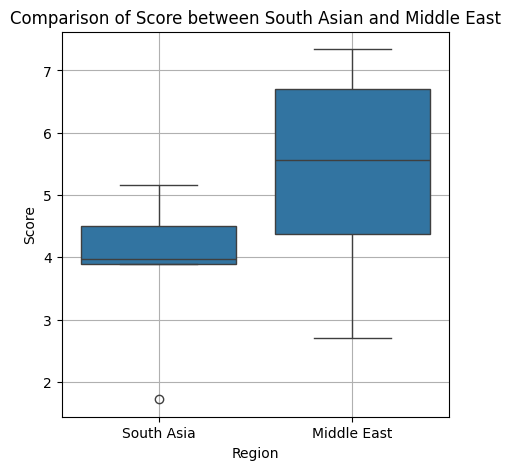

In [49]:
#Add Region column for both datasets
south_asian_data.loc[:, 'Region'] = 'South Asia'
middle_east_data.loc[:, 'Region'] = 'Middle East'
#Combine the datasets
combined_data = pd.concat([south_asian_data[['score', 'Region']], middle_east_data[['score', 'Region']]])

#Create the boxplot
#Add figure size
plt.figure(figsize=(5,5))
sns.boxplot(x='Region', y='score',data=combined_data)
plt.title('Comparison of Score between South Asian and Middle East')
plt.xlabel('Region')
plt.ylabel('Score')
plt.grid()
plt.show()

• Interpret the key differences in distribution shapes, medians, and outliers.


Key differences:

1. Distribution Shapes:
South Asia has a narrower distribution score than Middle east due to lower happiness scores.

2. Median:
The median score of Middle East tends to be higher than that of South Asia.

3. Outliers:
There is one outlier in South Asia i.e. Afghanistan(exceptionally low score), whereas none is present in Middle East.
